# Unit 1 Sprint 3 Challenge - Linear Algebra


## Welcome to the final sprint challenge of Unit 1!

In this challenge, we're going to explore two different datasets where you can demonstrate your skills with fitting linear regression models and linear algebra.

Good luck!

### Tasks

* Load and explore the first dataset
* Fit a simple linear regression model to one independent variable
* Fit a regression model to two independent variables
* Interpret R-squared and an adjusted R-squared values
* Load word vector data and explore
* Calculate the cosine similarity between the vectors

---

### Data: Information

This dataset is a record of seven common different fish species in fish market sales. With this dataset, we can practice fitting linear regression models. More information can be found at the link below.

* [Kaggle: Fish Market Dataset](https://www.kaggle.com/aungpyaeap/fish-market)

## 1) Load the data

* From the URL provided, load the CSV file as a DataFrame - arguments: use the default parameters for `pandas.read_csv()`
* The shape of your DataFrame should be `(159, 7)`

In [ ]:
# Load the data
import pandas as pd

# URL provided
url = "https://raw.githubusercontent.com/LambdaSchool/data-science-practice-datasets/main/unit_1/Fish/Fish.csv"

### your code here ###
df = pd.read_csv(url)
df


,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340
...,...,...,...,...,...,...,...
154,Smelt,12.2,11.5,12.2,13.4,2.0904,1.3936
155,Smelt,13.4,11.7,12.4,13.5,2.4300,1.2690
156,Smelt,12.2,12.1,13.0,13.8,2.2770,1.2558
157,Smelt,19.7,13.2,14.3,15.2,2.8728,2.0672


## 2) Explore, Visualize, and Clean

Now you want to take a look at the dataset, figure out what variable types the columns contain, identify missing values, and possibly look for outliers.

**Your tasks**

* Use describe() and info() to learn about any missing values, the data types, and descriptive statistics for each numeric value

*Hint: look at the minimum values for each column - would it make sense to remove rows that have a `0` in any of the columns?*

In [ ]:
### your code here ###
df.describe()
df[df['Weight'] == 0]
new = df.drop(index = 40, axis = 0)
new[0:50]
new.describe()

,Weight,Length1,Length2,Length3,Height,Width
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,400.847468,26.293038,28.465823,31.280380,8.986790,4.424232
std,357.697796,10.011427,10.731707,11.627605,4.295191,1.689010
min,5.900000,7.500000,8.400000,8.800000,1.728400,1.047600
25%,121.250000,19.150000,21.000000,23.200000,5.940600,3.398650
50%,281.500000,25.300000,27.400000,29.700000,7.789000,4.277050
75%,650.000000,32.700000,35.750000,39.675000,12.371850,5.586750
max,1650.000000,59.000000,63.400000,68.000000,18.957000,8.142000


Answer -->

**No missing values in the dataset but there is one zero values under weight that can be dropped**

## 3) Visualize and Identify the Target

Now that you know more about the data, we need to identify the *target* or response variable: what are we trying to predict? You can create a visualization to look at all of the numeric variables.

**Your tasks**

* Use the seaborn library `sns.pairplot()` function to create your visualization (use the starter code)
* Using the pairplot, identify two variables that you will use to fit a linear regression model

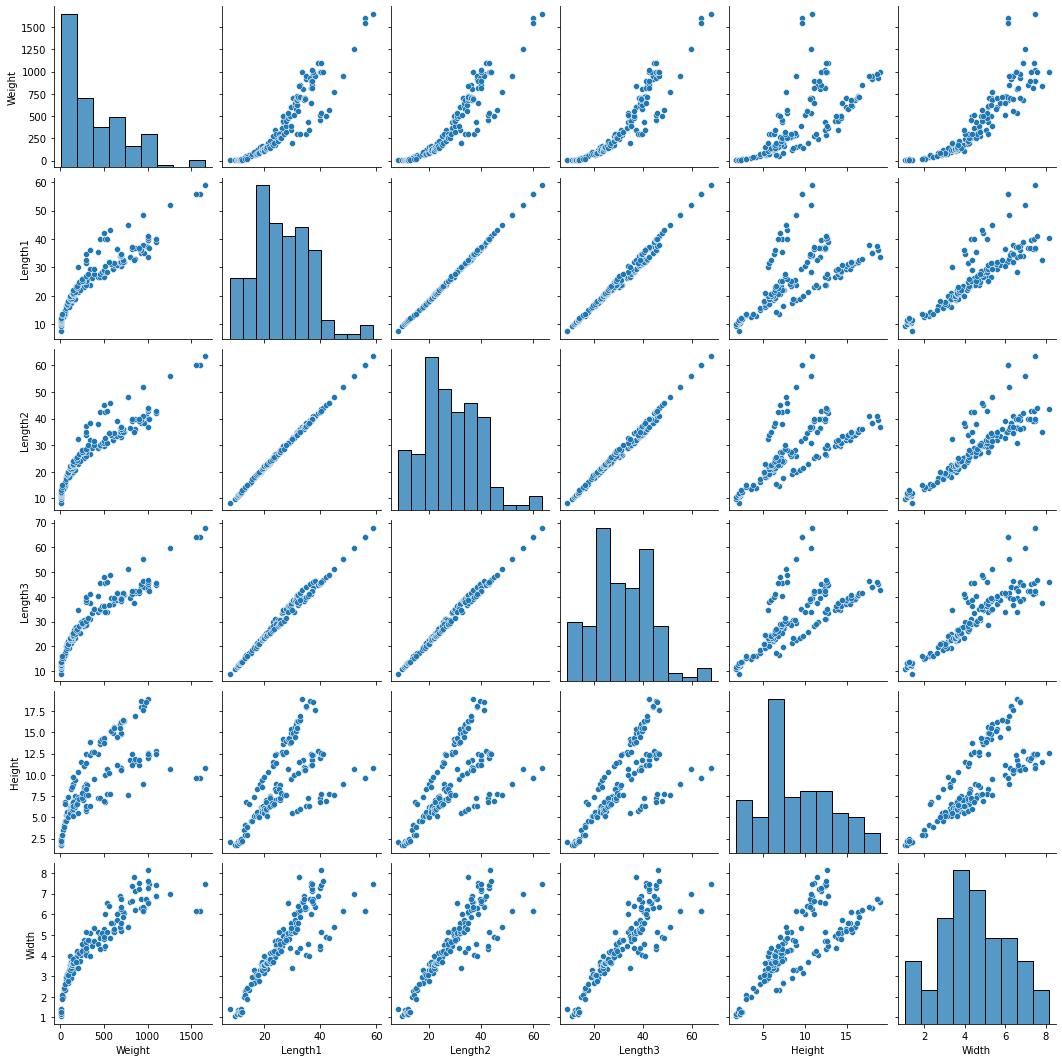

In [ ]:
# Import seaborn
import seaborn as sns

# Use sns.pairplot(data) where data is the name of your DataFrame
sns.pairplot(data = new)

## your code here ##

### Short answer:

* What are the two variables you will use to fit a linear regression model and why did you choose them?



Answer --> 

**I chose Weight ~ Length3. Since Length3 is the maximum length being the cross sectional length (and assuming fish are usually elongated) I expect the Weight to increase as the fish Length3 increases.**

## 4) Create a scatter plot with a best-fit line

Before we fit the linear regression model, we'll check how well a line fits our two variables. Because you have some choices for which independent variable to select, we're going to complete the rest of our analysis using `Width` as the independent variable and `Weight` as the dependent (target) variable.

**Your tasks:**

* Create a scatter plot using seaborn with `Width` and `Weight`
* Use the sns.lmplot() and specify a confidence interval of 0.95
* Answer the questions about your plot.


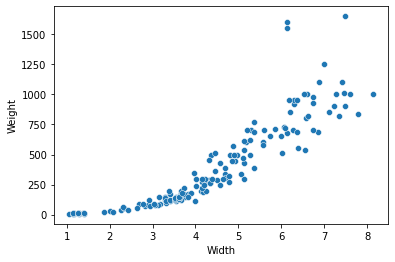

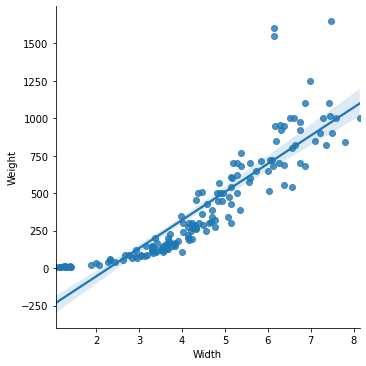

In [ ]:
## your code here ##
# Y ~ X or Weight ~ Width
sns.scatterplot(x = 'Width', y ='Weight',data = new)
sns.lmplot(x = 'Width', y ='Weight',data = new, ci = 95)

### Short answer:

1. Does it make sense to fit a linear model to these two variables? In otherwords, are there any problems with this data like extreme outliers, non-linearity, etc.
2. Over what range of your independent variable does the model not fit the data well?

Answer-->

1. **There seems to be a problem with the linear model of these two variables. The points are not scatter in a straight line closer to the y-axis and there are three points that are an outlier. The data is clearly non linear in the beginning but we are forcing a linear regression on it anyways.**

2. **The data does not fit well in the range 1-3 cms of Width and it shouldn't since the Weight is negative in this region if we try to fit a linear regression in the dataset.**

## 5) Fit a linear regression model

Now it's time to fit the linear regression model! We have two variables (`width` and `weight`).

**Your tasks:**

*  Use the `statsmodels.formula.api` library and import the `ols` method
*  Fit a **single variable linear regression model** and print out the model summary
*  Answer the questions about your resulting model parameters

In [ ]:
## your code here ##
from statsmodels.formula.api import ols
# Y ~ X or Weight ~ Width
model = ols('Weight ~ Width', data = new).fit()

print (model.summary())

                            OLS Regression Results                            
Dep. Variable:                 Weight   R-squared:                       0.786
Model:                            OLS   Adj. R-squared:                  0.785
Method:                 Least Squares   F-statistic:                     573.5
Date:                Sun, 13 Dec 2020   Prob (F-statistic):           4.02e-54
Time:                        00:33:18   Log-Likelihood:                -1030.8
No. Observations:                 158   AIC:                             2066.
Df Residuals:                     156   BIC:                             2072.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -429.9133     37.117    -11.583      0.0

### Short Answer:
1. Is the correlation between your variables positive or negative?
2. How would you write the confidence interval for your slope coefficient?
3. State the null hypothesis to test for a statistically significant relationship between your two variables.
4. Using the P value from your model, do you **reject** or **fail to reject** the null hypothesis?

Answer-->

**1. There is a positive correlation between the two variables.**

**2. We can be 95% sure that the slope Width of the fish population when plotted against Weight will lie between 172.76 and 203.738.**

**3. The null hypothesis to test for a statistically significant relationship between the two variable is that there is NO relationship between them.**

**4. Based on the P-value of 0% and an alpha of 5% we can reject the null hypothesis and it can be concluded that there IS a relationship between Weight and Width in the fish population.**

## 6) Fit a multiple predictor linear regression model

For this next task, we'll add in an additional independent or predictor variable. Let's look back at the pairplot and choose another variable - we'll use `Length1`.

Now fit linear regression model using two predictor variables: `Width` and `Length1`.

**Your tasks:**

* Select an additional predictor variable
* Fit a model with both variables and print out the model summary
* Answer the questions about your model

In [ ]:
## your code here ##
# Y ~ X or Weight ~ Width + Length1
model = ols('Weight ~ Width + Length1', data = new).fit()

print (model.summary())

                            OLS Regression Results                            
Dep. Variable:                 Weight   R-squared:                       0.873
Model:                            OLS   Adj. R-squared:                  0.872
Method:                 Least Squares   F-statistic:                     534.2
Date:                Sun, 13 Dec 2020   Prob (F-statistic):           2.91e-70
Time:                        00:33:23   Log-Likelihood:                -989.47
No. Observations:                 158   AIC:                             1985.
Df Residuals:                     155   BIC:                             1994.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -505.2904     29.577    -17.084      0.0

### Short answer:

1. What percentage of the variance is explained by your first variable (when you only had one predictor variable)?
2. How does the adjusted R-squared value change when a second pedictor variable is added?

Answer-->

**1. The variation in Weight can be explained 78.5% by the variation in Width alone.**

**2. The R-squared value increased from 78.5% to 87.2% when we added the second predictor variable - Length1. Therefore the Weight is explained better with Length1 in addition to the Width variable.**

## Part 2: Vectors and cosine similarity

In this part of the challenge, we're going to look at how similar two vectors are. Remember, we can calculate the **cosine similarity** between two vectors by using this equation:

$$\cos \theta= \frac{\mathbf {A} \cdot \mathbf {B} }{\left\|\mathbf {A} \right\|\left\|\mathbf {B} \right\|}$$

$\qquad$

The numerator is the dot product of the vectors $\mathbf {A}$ and $\mathbf {B}$

The denominator is the norm of $\mathbf {A}$ times the norm of $\mathbf {B}$

### Three documents, two authors

For this task, you will calculate the cosine similarity between three vectors. But here's the interesting part: each vector represents a "chunk" of text from a novel (a few chaptes of text). This text was cleaned to remove non-alphanumeric characters and numbers and then each document was transformed into a vector representation as described below. 

### Document vectors

In the dataset you are going to load below, each row represents a word that occurs in at least one of the documents. So all the rows are all the words that are in our three documents.

Each column represents a document (doc0, doc1, doc2). Now the fun part: the value in each cell is how frequently that word (row) occurs in that document (term-frequency) divided by how many documents that words appears in (document-frequency).

`cell value = term_frequency / document_frequency`

### Using cosine similarity

You will be using cosine similarity to compare each document vector to the others. Remember that there are three documents, but two authors. Your task is to use the cosine similarity calculations to determine which two document vectors are most similar (written by the same author).

**Your tasks:**

* Load in the csv file that contains the document vectors (this is coded for you - just run the cell)
* Look at the DataFrame you just loaded in any way that helps you understand the format, what's included in the data, the shape of the DataFrame, etc.
* Calculate the cosine similarity for **three pairs of vectors**
  * doc0-doc1
  * doc0-doc2
  * doc1-doc2

* Print out the results so you can refer to them
* Answer the questions after you have completed the cosine similarity calculations


In [2]:
# Imports (import pandas if you haven't)
import pandas as pd

# Load the data - DON'T DELETE THIS CELL
url = 'https://raw.githubusercontent.com/LambdaSchool/data-science-practice-datasets/main/unit_4/unit1_nlp/text_vectors.csv'
text = pd.read_csv(url, index_col=0)


In [7]:

## Explore the data
text
## your code here ##
text.describe()

,doc0,doc1,doc2
count,3389.000000,3389.000000,3389.000000
mean,0.003803,0.009964,0.008032
std,0.016754,0.013995,0.015186
min,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000
50%,0.000000,0.008045,0.005265
75%,0.000000,0.010578,0.008915
max,0.597152,0.193676,0.338754


In [5]:
## Calculate the cosine similarity

# Use these imports for you cosine calculations (DON'T DELETE)
from numpy import dot
from numpy.linalg import norm

## your code here ##
cos_sim_doc0_doc1 = dot(text['doc0'],text['doc1']) / (norm(text['doc0']) * norm(text['doc1']))
cos_sim_doc0_doc2 = dot(text['doc0'],text['doc2']) / (norm(text['doc0']) * norm(text['doc2']))
cos_sim_doc1_doc2 = dot(text['doc1'],text['doc2']) / (norm(text['doc1']) * norm(text['doc2']))

print ('The cosine similarity between doc0-doc1 (in percentage) is', cos_sim_doc0_doc1*100)
print ('The cosine similarity between doc0_doc2 (in percentage) is', cos_sim_doc0_doc2*100)
print ('The cosine similarity between doc1_doc2 (in percentage) is', cos_sim_doc1_doc2*100)


The cosine similarity between doc0-doc1 (in percentage) is 12.96380132160888
The cosine similarity between doc0_doc2 (in percentage) is 9.904444112880153
The cosine similarity between doc1_doc2 (in percentage) is 32.171252792371725


## Short answer

1. Using your cosine similarity calculations, which two documents are most similar?
2. If doc1 and doc2 were written by the same author, are your cosine similarity calculations consistent with this statement?
3. What process would we need to follow to add an additional document column? In other words, why can't we just stick another column with (term-frequency/document-frequency) values onto our current DataFrame `text`?

Answer-->

**1. By cosine similarity it can be concluded that doc1 and doc2 is the most similar compared to other documents combinations.**

**2. YES, my finding agrees that doc1 and doc2 could have come from the same author.**

**3. We cannot just add a new column as we will need to adjust our existing data that came from the three documents only in order to compare apples to apples. The stats in existing data will need to account for the words in the fourth document to make sense. Ignoring this adjustment will not make any sense for the outcome.**


**Additional Information about the texts used in this analysis:**

You can find the raw text [here](https://github.com/LambdaSchool/data-science-practice-datasets/tree/main/unit_4/unit1_nlp). Dcoument 0 (doc0) is chapters 1-3 from "Pride and Predjudice" by Jane Austen. Document 1 (doc1) is chapters 1- 4 from "Frankenstein" by Mary Shelley. Document 2 is also from "Frankenstein", chapters 11-14.